## Lyft Challenge!

https://www.udacity.com/lyft-challenge

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import pdb
from pathlib import Path

In [69]:
VEHICLES = 10 # Data encoding in the segmented image
ROADS = 7
ROAD_LINES = 6

def open_image(fn):
    """ Opens an image using OpenCV given the file path.

    Arguments:
        fn: the file path of the image

    Returns:
        The image in RGB format as numpy array of ints
    """
    flags = cv2.IMREAD_UNCHANGED+cv2.IMREAD_ANYDEPTH+cv2.IMREAD_ANYCOLOR
    if not os.path.exists(fn):
        raise OSError('No such file or directory: {}'.format(fn))
    elif os.path.isdir(fn):
        raise OSError('Is a directory: {}'.format(fn))
    else:
        try:
            im = cv2.imread(str(fn), flags)
            if im is None: raise OSError(f'File not recognized by opencv: {fn}')
            return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        except Exception as e:
            raise OSError('Error handling image at: {}'.format(fn)) from e

def show_img(im, figsize=(10,10), ax=None, seg=False, channel=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    new_img = np.copy(im) # Prevent the original im from being modified
    if seg:
        new_img = new_img[:,:,0] # Grab just the red channel from the RGB image
        if channel:
            new_img[new_img != channel] = 0 # Display only the requested objects (roads etc)
    ax.imshow(new_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

PATH = Path('train')

In [5]:
list(PATH.iterdir())

[PosixPath('train/CameraSeg'), PosixPath('train/CameraRGB')]

In [6]:
RGB_PATH = PATH/'CameraRGB'
list(RGB_PATH.iterdir())[:5]

[PosixPath('train/CameraRGB/5.png'),
 PosixPath('train/CameraRGB/88.png'),
 PosixPath('train/CameraRGB/0.png'),
 PosixPath('train/CameraRGB/128.png'),
 PosixPath('train/CameraRGB/406.png')]

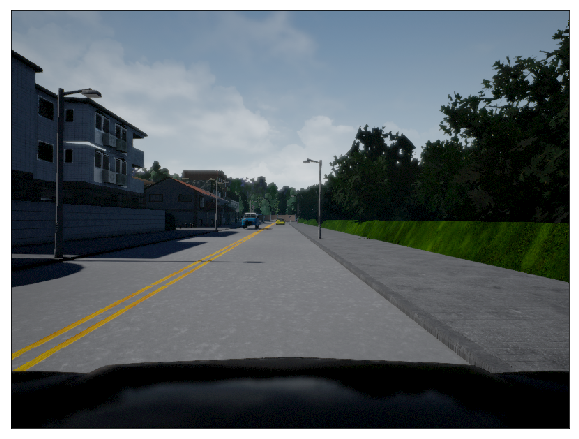

In [22]:
test_RGB_image = open_image(next(RGB_PATH.iterdir()))
show_img(test_RGB_image)

In [8]:
seg_PATH = PATH/'CameraSeg'
list(seg_PATH.iterdir())[:5]

[PosixPath('train/CameraSeg/5.png'),
 PosixPath('train/CameraSeg/88.png'),
 PosixPath('train/CameraSeg/0.png'),
 PosixPath('train/CameraSeg/128.png'),
 PosixPath('train/CameraSeg/406.png')]

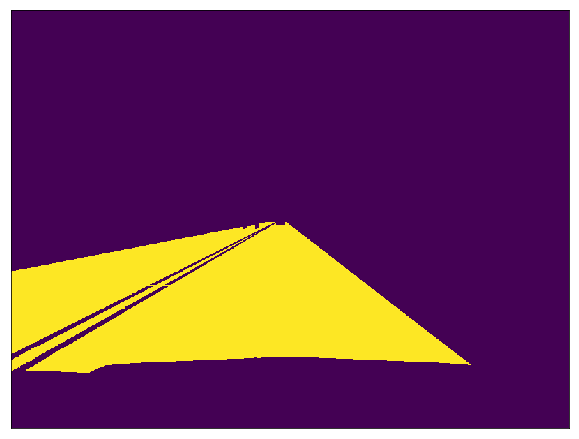

In [70]:
test_seg_image = open_image(next(seg_PATH.iterdir()))
show_img(test_seg_image, seg=True, channel=(ROADS|ROAD_LINES))

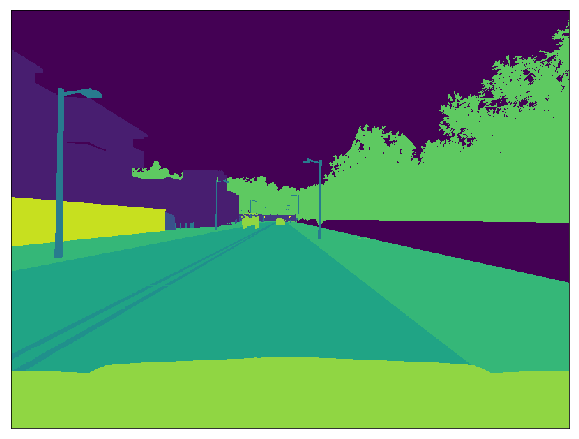

In [67]:
show_img(test_seg_image, seg=True)

In [71]:
(6|7)

7